Model train time for lower volumes in high_mem cpu


Size: 1000, Time taken: 0.01 seconds


Size: 10000, Time taken: 1.25 seconds


Size: 20000, Time taken: 8.82 seconds


Size: 30000, Time taken: 28.84 seconds


Size: 40000, Time taken: 69.43 seconds


Size: 50000, Time taken: 136.98 seconds


Size: 60000, Time taken: 227.51 seconds


Size: 70000, Time taken: 363.52 seconds


Size: 100000, Time taken: 1115.27 seconds


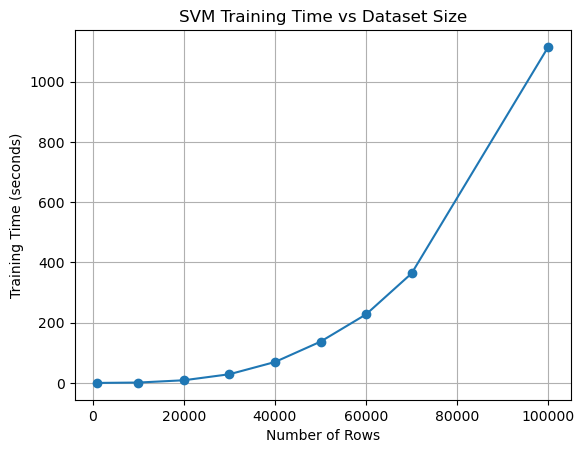

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load your full dataset
df = pd.read_csv("../data/data_selected.csv")

# Features and labels
X = df.drop(columns=['loan_status_mapped', 'loan_status_binary'])
y = df['loan_status_binary']

# Dataset sizes to test
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 100000]
times = []

print("Model train time for lower volumes in high_mem cpu")

for size in sizes:
    # Sample the dataset
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sample)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sample, test_size=0.2)

    # Time the training
    start = time.time()
    clf = SVC(kernel="rbf", C=1.0, gamma='scale')
    clf.fit(X_train, y_train)
    end = time.time()

    elapsed_time = end - start
    times.append(elapsed_time)
    print(f"Size: {size}, Time taken: {elapsed_time:.2f} seconds")

# Plotting
plt.plot(sizes, times, marker='o')
plt.title("SVM Training Time vs Dataset Size")
plt.xlabel("Number of Rows")
plt.ylabel("Training Time (seconds)")
plt.grid(True)
plt.show()
